# Anime Recommendation System

### Objective: 
    To build an anime recommendation system. 
  
Dataset: Anime recommendation dataset from https://www.kaggle.com/CooperUnion/anime-recommendations-database. 

Recommendation Systems:
    Problem: 
        - Identifying User's need
        - Excess/abundance of options/choices
   
    Solution: Recommend user items that he/she most likely wants.
    Filtering:
        i) item-item
        ii) user-item

There are a lot of ideas in case of recommender sytems (recsys). Following are general types:

    - Content Based        
    - Collaborative Filtering (CF)
    - Hybrid Recommender Systems
    - Demographic Based
    - Utility Based
    - Knowledge Based
    
There are also subtypes based on algorithmic approach:
    - Memory Based 
    - Model Based
    
Note: There are many variations/flavors of RecSys depending on Data, Approach & Algorithm used.



### Scope:
    
For this project, I'll start with building a basic model. And move forward from there by applying more complex approaches and comparing the results along the way.

#### RoadMap:
Data Set: Anime Recommendation

1. Fetch Data:
    Files: 
        1. Anime.csv -> 'anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members
        2. Rating.csv -> 'user_id', 'anime_id', 'rating'

2. Wrangle, Prepare and Cleanse Data

3. Analyze, identify patterns, and explore the data.
    - Exploratory Data Analysis
    - Dimensionality Reduction using PCA
    - Clustering using k-means and         
    - Feature Extraction & Feature Selection
    
4. Model, predict/recommendation.
    4.1. Memory Based Filtering
    
        4.1.1 Content Based Recommendation
            - comparing similarity between different items' charactistics.
            - item-item recommendation using item's features covariance matrix for calculating similarity.
           
        4.1.2 Collaborative Filtering 
            - Generate recommendation by finding user's with similar taste using explicit feedback (user-item rating matrix)
            
            ref link: https://medium.com/ml-algorithms/collaborative-filtering-in-python-56e7fe9a5a8d
        
         
    4.2. Latent Factor Modeling
        Matrix factorization using:
            - Alternating Lease Square (ALS)/Singular Value Decomposition (SVD)/ Stocastic Gradient Descent
        
    4.3. Model Based Filtering
        i) Content Based Recommendation
            - item-item recommendation using item's features covariance matrix for calculating similarity.
           
        ii) Collaborative Filtering 
            - Generate recommendation by finding user's with similar taste using explicit feedback (user-item rating matrix)
        
         Predictive Algorithms:
            - Classification: Logistic Regression
            - KNN
            - Bayesian Classifier
            - RBM (Neural Network)
    4.4. Hybrid Modeling
        Here, we will try to combine different algorithms to overcome different issues like: Accuracy, Cold-start, stability, sparsity etc.
        Seven hybridization techniques:
            - Weighted: The score of different recommendation components are combined numerically.
            - Switching: The system chooses among recommendation components and applies the selected one.
            - Mixed: Recommendations from different recommenders are presented together.
            - Feature Combination: Features derived from different knowledge sources are combined together and given to a single recommendation algorithm.
            - Feature Augmentation: One recommendation technique is used to compute a feature or set of features, which is then part of the input to the next technique.
            - Cascade: Recommenders are given strict priority, with the lower priority ones breaking ties in the scoring of the higher ones.
            - Meta-level: One recommendation technique is applied and produces some sort of model, which is then the input used by the next technique.
        
    4.5. Association Rules
    
5. Visualize, report, and present comparison and final solution.

6. Supply the results




### 1. Fetch Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#load data
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

### 2. Data Wrangling

In [3]:
anime.info()
# what is the relationship of members with anime rating, and count of user ratings, episodes
# missing values in genre, type, rating


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


### Data Cleaning
Note: 
    - Use rating_count as feature for content based RS.
    - make anime name into vector features using tf-idf/nltk
    - A few entries has genre = '1', fix the issue

In [4]:
# Missing Values

# replace Unknown episodes for Hentai, OVA & Movie with 1
anime.loc[(anime["genre"]=="Hentai") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"]=="OVA") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"] == "Movie") & (anime["episodes"] == "Unknown")] = "1"

# update number of episodes for known till Mar 2017.
known_animes = {"Naruto Shippuuden":500, "One Piece":784,"Detective Conan":854, "Dragon Ball Super":86,
                "Crayon Shin chan":942, "Yu Gi Oh Arc V":148,"Shingeki no Kyojin Season 2":25,
                "Boku no Hero Academia 2nd Season":25,"Little Witch Academia TV":25}

for k,v in known_animes.items():    
    anime.loc[anime["name"]==k,"episodes"] = v

# replace remaining missing episodes with mean value of Type group.
anime["episodes"] = anime["episodes"].map(lambda x:np.nan if x=="Unknown" else x).astype(float)

anime.loc[anime.episodes.isnull(), 'episodes'] = anime.groupby('type').episodes.transform('median')

# replace missing rating with mean value of Type, episodes
anime["rating"] = anime["rating"].astype(float)

anime.loc[anime.rating.isnull(), 'rating'] = anime.groupby('type').rating.transform('mean')

# remove duplicate anime_ids (anime_id =1 , freq=3)
anime.drop_duplicates('anime_id',keep='first',inplace= True)

# remove record with multiple missing columns
anime.dropna(inplace=True)

#anime.to_csv("anime-updated.csv")

In [6]:
anime.describe(include='all')

,anime_id,name,genre,type,episodes,rating,members
count,12207.0,12207,12207,12207,12207.000000,12207.000000,12207.0
unique,12207.0,12205,3260,7,NaN,NaN,6691.0
top,18061.0,Shi Wan Ge Leng Xiaohua,Hentai,TV,NaN,NaN,60.0
freq,1.0,2,823,3777,NaN,NaN,36.0
mean,NaN,NaN,NaN,NaN,12.659703,6.480434,NaN
std,NaN,NaN,NaN,NaN,47.546728,1.018056,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,5.900000,NaN
50%,NaN,NaN,NaN,NaN,2.000000,6.570000,NaN
75%,NaN,NaN,NaN,NaN,12.000000,7.170000,NaN


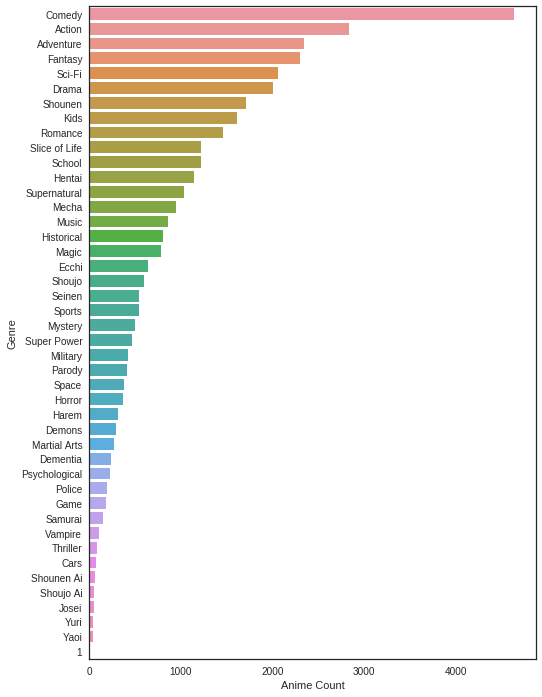

In [34]:
# analyzing genre data
import collections
g_list = [val.strip() for gen in anime['genre'].str.split(",") if type(gen) != float for val in gen]
genre_counter = collections.Counter(g_list)
genres = pd.DataFrame.from_dict(genre_counter, orient='index').reset_index().rename(columns={'index':'genre', 0:'count'})
genres.sort_values('count', ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(8, 12))
sns.barplot(x="count", y="genre", data=genres)
ax.set(ylabel='Genre',xlabel="Anime Count")


In [9]:
# creating user data for analysis
user_data = pd.DataFrame()
user_data['anime_w'] = rating.groupby(by='user_id')['rating'].count()
user_data['anime_r'] = rating[rating.rating > 0].groupby(by='user_id')['rating'].count()
user_data['anime_nr'] = user_data['anime_w'] - user_data['anime_r']

# cleaning rating.csv
# removing outlier from rating.csv
# user_id = 48766 is an outlier which can be observed by plotting graph b/w anime_watch and anime_rated.
# rating by this user are not useful
rating = rating[rating['user_id'] != 48766]
rating = rating[rating.rating > 0]


user_data.corr()


,anime_w,anime_r,anime_nr
anime_w,1.0,1.0,NaN
anime_r,1.0,1.0,NaN
anime_nr,NaN,NaN,NaN


In [41]:
# n_users = 37128(~37k)
#user_data[user_data['anime_w']>10000]


,anime_nr,anime_w,anime_r
anime_nr,1.000000,0.500728,-0.064951
anime_w,0.500728,1.000000,0.831254
anime_r,-0.064951,0.831254,1.000000


In [ ]:

#sns.lmplot('anime_w', 'anime_nr', user_data, fit_reg=False, )
#sns.lmplot('anime_w', 'anime_r', user_data, fit_reg=False)
#user_data.hist('anime_w', bins=25)
user_data[user_data['anime_w'] > 2000].sort_values(by='anime_r', ascending=False)
#user_data.plot()
#user_anime_ids = 
user_anime_ids  = list(rating[rating['user_id']== 28521]['anime_id'])
anime[anime.anime_id in user_anime_ids]
#user_anime_list = anime.anime_id.isin(user_anime_ids)
#user_anime_list

## 3. Analyze, identify patterns, and explore the data.
    - Exploratory Data Analysis
    - Dimensionality Reduction using PCA
    - Clustering using k-means
    - Feature Extraction & Feature Selection

In [6]:
# feature selection
genre_list = anime["genre"].str.get_dummies(sep=",")
genre_list.drop('1', axis=1,inplace=True)
anime_features = pd.concat([genre_list,pd.get_dummies(anime["type"]),anime[["rating"]],anime[["members"]],anime["episodes"]],axis=1)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)
name_vec = list(vectorizer.fit_transform(anime['name']).toarray())


In [49]:
# remove entries with rating -1
rating = rating[rating.rating != -1]
rating.head()

(array([    0,     0,     0, ..., 12293, 12293, 12293]),
 array([ 5463,  7154,  7530, ...,  8374, 11645, 11732]))

In [12]:
from scipy import sparse
import implicit

# creating user-item rating sparse matrix
user_list = list(np.sort(rating.user_id.unique())) # Get our unique customers
anime_list = list(rating.anime_id.unique()) # Get our unique products that were purchased
rating_list = list(rating.rating) # All of our purchases

rows = rating.user_id.astype('category', categories = user_list).cat.codes 
# Get the associated row indices
cols = rating.anime_id.astype('category', categories = anime_list).cat.codes 
# Get the associated column indices
rating_sparse = sparse.csr_matrix((rating_list, (rows, cols)), shape=(len(user_list), len(anime_list)))

# calculating matrix sparsity
matrix_size = rating_sparse.shape[0]*rating_sparse.shape[1] # Number of possible interactions in the matrix
num_purchases = len(rating_sparse.nonzero()[0]) # Number of items interacted with
sparsity = 100*(1 - (num_purchases/float(matrix_size)))
sparsity



#rating.pivot(index='anime_id', columns='user_id', values='rating')
#n_users = rating.user_id.nunique()
#n_anime = rating.anime_id.nunique()

#print("users: " + str(n_users) + " x  Anime: " + str(n_anime))
#rating.shape



99.08278218350279

In [11]:
alpha = 15
user_vecs, item_vecs = implicit.alternating_least_squares((rating_sparse*alpha).astype('double'), 
                                                          factors=20, 
                                                          regularization = 0.1, 
                                                         iterations = 50)

No handlers could be found for logger "implicit"


In [38]:
anime[anime.anime_id.isin(rating[rating['user_id']==1]['anime_id'])]
#rating[rating.user_id == 1]

,anime_id,name,genre,type,episodes,rating,members
724,15451,High School DxD New,"Action, Comedy, Demons, Ecchi, Harem, Romance,...",TV,12,7.87,266657
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1057,11617,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School",TV,12,7.70,398660
1709,8074,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


#### Observation:
    - in order to perform CF on full dataset, we require matrix of 7.8m x 7.8m 
    options:
        i) take sample dataset to perform CF
            - animes rated by a specific number of users (i.e. n> 50: to reduce dataset but increase user behavior detection
        ii) find a way to reduce matrix or handle large matrix in python
            - PyTable : to store tables on disk
            - Scipy : sparse matrix

### Data Mining

Idea:
    - split genres using dummies variables
    - perform eigen vector analysis to find out PC count
    - perform PCA with n_components
    - combine transformed matrix with rest of the features (i.e. type, rating, member, name, count)
    
    does it work any better?

### Dimensionality Reduction 
    - using eigen decomposition

In [16]:
# Calculating Eigenvectors and eigenvalues  Cov matirx
feature_mat = anime_features_scaler # genre_list
mean_vec = np.mean(feature_mat, axis=0)
cov_mat = np.cov(feature_mat.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Creating a list of (eigenval, eigenvec) tuples
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

tot = sum(eig_vals)

exp_var = [ (i/tot)*100 for i in sorted(eig_vals,reverse=True)]

cum_exp_var = np.cumsum(exp_var)
len(exp_var)

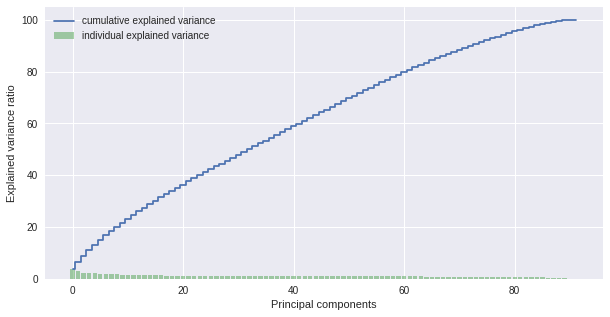

In [21]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(exp_var)), exp_var, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(exp_var)), np.cumsum(exp_var), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [136]:
# from above chart we can see about 50 PCs will cover 95% data

# EDA using Unsupervised techniques
# imports
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import kernel_approximation

from pandas.plotting import parallel_coordinates

In [ ]:
# kernel_approximation.

feat_mat = anime_features_scaler
pca = sklearnPCA(n_components=92)
rpca = sklearnPCA(n_components=92, svd_solver='randomized')
lda = LDA(n_components=92)
#transformed = pca.fit_transform(MaxAbsScaler().fit_transform(genre_feature))
transformed = pca.fit_transform(feat_mat)
transformed = rpca.fit_transform(feat_mat)

#headmap to show correlation of pca.components_ with original columns
#df_comp = pd.DataFrame(pca.components_,columns=feat_mat.columns)
#plt.figure(figsize=(20,8))
#sns.heatmap(df_comp,cmap='plasma',)
#sns.clustermap(df_comp,cmap='plasma',)

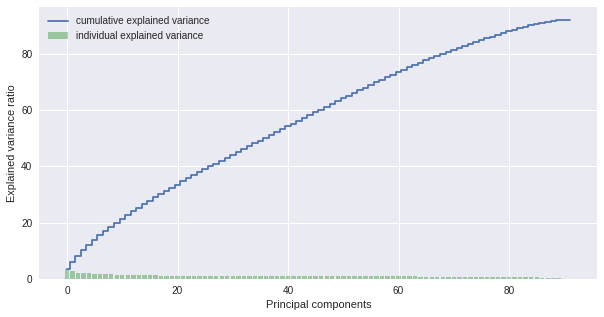

In [41]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(rpca.explained_variance_)), rpca.explained_variance_, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(rpca.explained_variance_)), np.cumsum(rpca.explained_variance_), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [24]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(pd.DataFrame(transformed).astype(float).corr(),vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

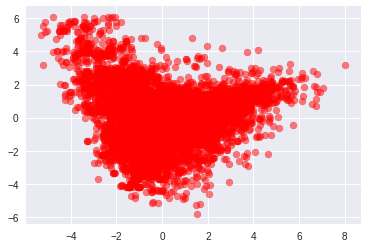

In [176]:
#sns.plt.scatter(pca.components_[1], pca.components_[4])
sns.plt.scatter(transformed[:,1], transformed[:,2],c='r',alpha=0.5)
#sns.plt.scatter(transformed[:,1], transformed[:,2],c='b',alpha=0.5)


In [ ]:
predictions = model.predict(test_user_ids,
                            test_item_ids,
                            user_features=user_features,
                            item_features=item_features)

In [56]:
plt.figure(figsize=(14, 10))
plt.title('Explained Variance Ratio over Component')
plt.plot(pca.explained_variance_ratio_)


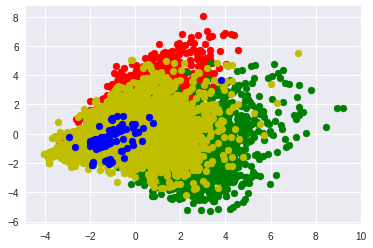

In [177]:
plt.scatter(transformed[genre_feature['Comedy']==1,0],transformed[genre_feature['Comedy']==1,1], c='r')
plt.scatter(transformed[genre_feature['Action']==1,0],transformed[genre_feature['Action']==1,1], c='g')
plt.scatter(transformed[(genre_feature['Comedy']==0) & (genre_feature['Action']==0) & (genre_feature['Sci-Fi']==0),0],transformed[(genre_feature['Comedy']==0) & (genre_feature['Action']==0) & (genre_feature['Sci-Fi']==0),1], c='y')

plt.scatter(transformed[genre_feature['Sci-Fi']==1,0],transformed[genre_feature['Sci-Fi']==1,1], c='b')


In [164]:
# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(transformed)
labels = kmeans.labels_

In [184]:
pcs_df = pd.DataFrame(transformed)[[3,4,5,10]]
pcs_df['c_labels'] = labels

In [55]:
sns.pairplot(pcs_df, hue='c_labels', palette= 'Dark2', diag_kind='kde',size=1.85)
# plt.scatter(transformed[:,0], transformed[:,1], c=labels, cmap='rainbow', alpha=0.5)

#### Feature Selection
    Create different feature vectors and matrix required to build models in section 4.
    
    There are almost 70k users and 10k anime. Creating a user-item rating matrix would result in a large and very sparse matrix of 70k x 10k. To efficient use resources I'll be using scipy's sparse matrix.

In [56]:
from scipy import sparse

# Create user-item rating sparse matrix

# Get unique user_id
user_list = list(np.sort(rating.user_id.unique())) 

# Get unique anime_id
anime_list = list(rating.anime_id.unique())  

# Get Anime ratings
rating_list = rating.rating.tolist() 

# Get the associated row indices
rows = rating.user_id.astype('category', categories = user_list).cat.codes 

# Get the associated column indices
cols = rating.anime_id.astype('category', categories = anime_list).cat.codes 


rating_sparse = sparse.csr_matrix((rating_list, (rows, cols)), shape=(len(user_list), len(anime_list)))

# calculating matrix sparsity
matrix_size = rating_sparse.shape[0]*rating_sparse.shape[1] # Number of possible interactions in the matrix
num_ratings = len(rating_sparse.nonzero()[0]) # Number of anime interacted with
sparsity = 100*(1 - (num_ratings/float(matrix_size)))
print("Matrix sparsity: " + str(sparsity))


Matrix sparsity: 99.0827821835


## 4. Model, predict/recommendation.
    In this section I will try to create different models for recommendation system using different techniques from Data Mining.

###    4.1. Memory Based Filtering
    Definition of memory based filtering system

####        4.1.1 Content Based Recommendation
        - comparing similarity between different items' charactistics.
        - item-item recommendation using item's features covariance matrix for calculating similarity.

    Procedure:
        - Normalize feature set 
        - Create similarity matrix
        - Generate recommendation based on top similar items.
            

In [52]:
# features scaling
from sklearn.preprocessing import StandardScaler

# genre_list_std = pd.DataFrame(StandardScaler().fit_transform(genre_list))  # no need, same scale features
anime_features_scaler = pd.DataFrame(StandardScaler().fit_transform(anime_features))
#anime_features_scaler.head()


In [53]:
# item-item similarity based on item's attributes
from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.metrics import jaccard_similarity_score

#print(jaccard_similarity_score(anime_features_scaler.iloc[2877], anime_features_scaler.iloc[159]))
sim_mat = cosine_similarity(anime_features_scaler)
sim_mat

In [10]:
# to get anime IDs from partial name
all_anime_names = list(anime.name.values)
def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))

In [11]:
get_id_from_partial_name("Akih")

('Akihabara Dennou-gumi: 2011-nen no Natsuyasumi', 3602)
('Akihabara Dennou-gumi', 4430)


In [54]:
# sim_mat.shape
def getSimilarItems(item, similarity_matrix, no_of_rec=5):
    sorted_items = np.argsort(similarity_matrix[item])
    reverse_sorted_items = sorted_items[::-1].tolist()
    top_items = reverse_sorted_items[1:no_of_rec+1]
    top_items_name = [anime.iloc[x]['name'] for x in top_items]
    return top_items_name[:no_of_rec]

#### Generating Recommendations:

In [15]:
get_id_from_partial_name('Rebor')

('Katekyo Hitman Reborn!', 175)
('Katekyo Hitman Reborn! Special', 997)
('Katekyo Hitman Reborn!: Mr. Rebokku no Ciao Ciao Interview', 1311)
('Katekyo Hitman Reborn! x \xc4\x93lDLIVE Special', 3024)


In [11]:
getSimilarItems(175, sim_mat)

['Bleach',
 'Hunter x Hunter (2011)',
 'Boku no Hero Academia',
 'Naruto',
 'One Piece']

In [11]:
naruto = pd.Series(sim_mat[28])
naruto_sort = naruto.sort_values(ascending=False)
for i in range(10):
    print(anime.iloc[naruto_sort.index[i]]['name'])
    
# we should try to match to accuracy of content based system by:
#  - get top n recommendations for anime (i.e. naruto)
#  - search for a user who have watch naruto and rated it high
#  - we can now compare recommendations with list of anime's user has watched and how he has rated (if any match exists)


Mushishi
Mushishi Zoku Shou
Mushishi Zoku Shou 2nd Season
Mushishi Special: Hihamukage
Mushishi Zoku Shou: Suzu no Shizuku
Mushishi Zoku Shou: Odoro no Michi
Baccano!
Pandora Hearts
Baccano! Specials
Bungou Stray Dogs


##### Content Based RS Observation:
    - we have a matrix of (observations, features) = (12294, 93)
    - in order to generate recommendations we had to find similarities of each item against all other items.
    - which result in a 12294 x 12294 similarity matrix (151142436 similarity values)
   

#### 4.1.2 Collaborative Filtering 
            - Generate recommendation by finding user's with similar taste using explicit feedback (user-item rating matrix)
            
    Procedure:
        - get user-item ratings sparse matrix (70k x 10k)
        - find similar users to our current user and recommend item they rated highly.
        Options:
            i) Generate a users similarity matrix of size 70k x 70k (too large for normal memory)
            ii) Nearest Neighbors
        
            
            ref link: https://medium.com/ml-algorithms/collaborative-filtering-in-python-56e7fe9a5a8d
        
         
         

In [ ]:
from sklearn.preprocessing import StandardScaler
# user-user similarity based on ratings
from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.metrics import jaccard_similarity_score
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5)
nbrs.fit(rating_sparse)


distances, indices = nbrs.kneighbors(rating_sparse)

